In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_excel(r"C:\Users\aryan\OneDrive\Desktop\Studi Idependen MSIB 6\Data Project\Orders Detail.xlsx")
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time
0,1,1,hawaiian_m,hawaiian,Classic,M,13.25,1,13.25,2015-01-01,11:38:36
1,2,2,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-01-01,11:38:36
2,3,2,five_cheese_l,five_cheese,Veggie,L,18.50,1,18.50,2015-01-01,11:57:40
3,4,2,ital_supr_l,ital_supr,Supreme,L,20.75,1,20.75,2015-01-01,11:57:40
4,5,2,mexicana_m,mexicana,Veggie,M,16.00,1,16.00,2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,ckn_alfredo,Chicken,M,16.75,1,16.75,2015-12-31,21:14:37
48616,48617,21348,four_cheese_l,four_cheese,Veggie,L,17.95,1,17.95,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,mexicana,Veggie,L,20.25,1,20.25,2015-12-31,21:23:10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   pizza_type_id     48620 non-null  object        
 4   category          48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   quantity          48620 non-null  int64         
 8   amount            48620 non-null  float64       
 9   date              48620 non-null  datetime64[ns]
 10  time              48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [4]:
# sample = df.sample(
#           n=None,
#           frac=0.10,
#           replace=False,
#           weights=None,
#           random_state=None,
#           axis=None,
#           ignore_index=False

In [7]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoders
label_encoder_pizza_id = LabelEncoder()
label_encoder_category = LabelEncoder()

# Fit and transform the 'pizza_type' column
df['pizza_id_numeric'] = label_encoder_pizza_id.fit_transform(df['pizza_id'])

# Fit and transform the 'pizza_size' column
df['pizza_category_numeric'] = label_encoder_category.fit_transform(df['category'])

# Get the mapping of the original values to their numeric equivalents
pizza_mapping = dict(zip(label_encoder_pizza_id.classes_, label_encoder_pizza_id.transform(label_encoder_pizza_id.classes_)))
cat_mapping = dict(zip(label_encoder_category.classes_, label_encoder_category.transform(label_encoder_category.classes_)))

In [8]:
# # Inverse mapping for pizza type
# inverse_type_mapping = {v: k for k, v in type_mapping.items()}

# # Map the numeric values back to original names
# df['pizza_type_new'] = df['pizza_type_numeric'].map(inverse_type_mapping)

In [9]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [10]:
conda install -c districtdatalabs yellowbrick


Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       haa95532_0         128 KB
    certifi-2024.8.30          |  py311haa95532_0         165 KB
    ------------------------------------------------------------
                                           Total:         292 KB

The following NEW packages will be INSTALLED:

  yellowbrick        pkgs/main/win-64::yellowbrick-1.5-py311haa95532_0 

The following packages will be UPDATED:

  ca-certificates                     2023.12.12-haa95532_0 --> 2024.7.2-haa95532_0 
  certifi                          2024.2.2-py311haa95532_0 --> 2024.8.30-py311haa95532_0 




certifi-2024.8.30    | 165 KB    |            |   0% 

ca-c



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [11]:
import site
print(site.getsitepackages())

['C:\\ProgramData\\anaconda3', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages']


In [13]:
data = df[['pizza_id_numeric','pizza_category_numeric','price','quantity']]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

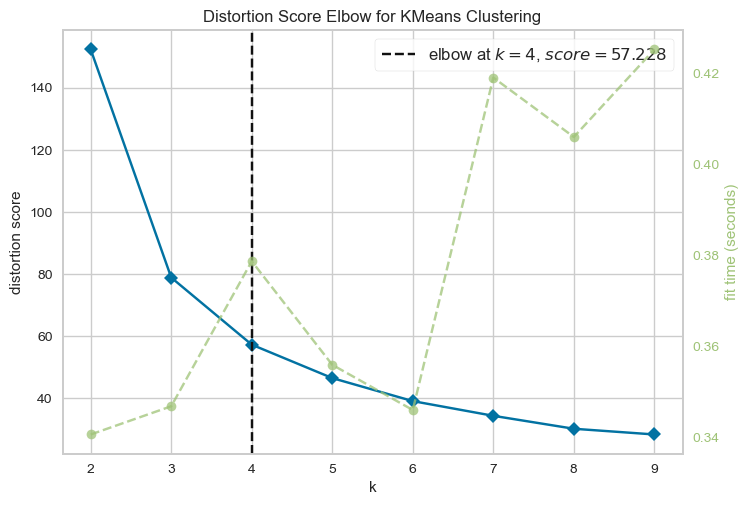

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load a sample dataset
data = datasets.load_iris().data

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

# Fit the data to the visualizer and render the figure
visualizer.fit(data)
visualizer.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

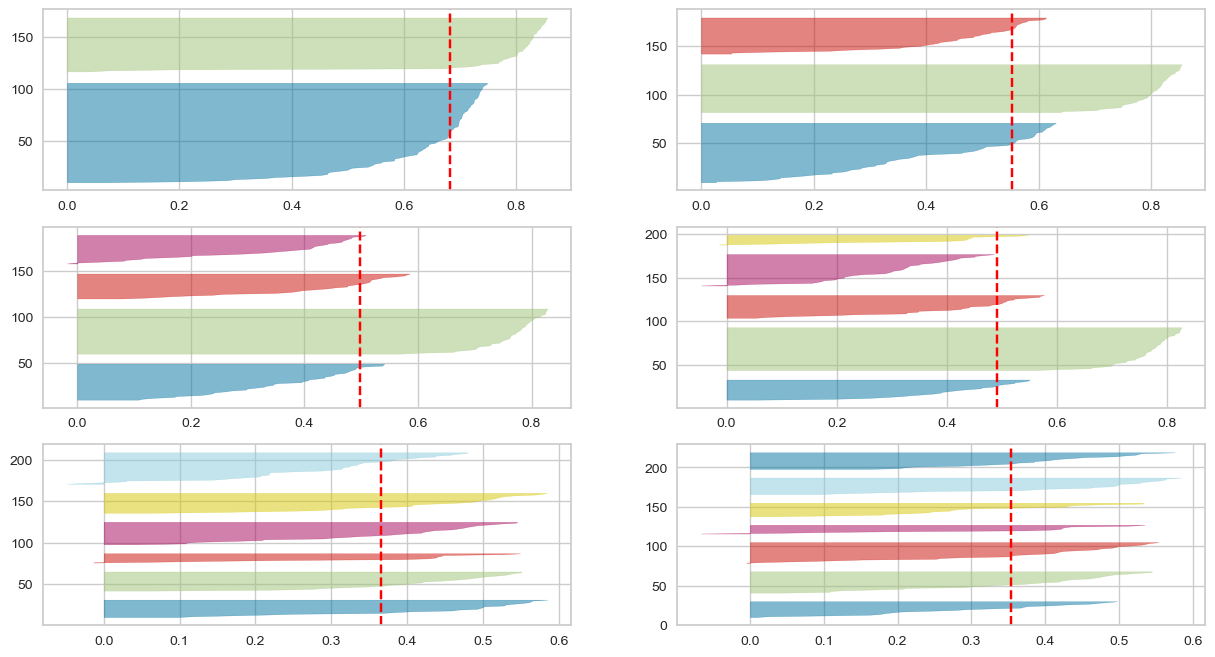

In [21]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)

K-Means

In [28]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit_predict(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [23]:
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time,pizza_id_numeric,pizza_category_numeric
0,1,1,hawaiian_m,hawaiian,Classic,M,13.25,1,13.25,2015-01-01,11:38:36,27,1
1,2,2,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-01-01,11:38:36,18,1
2,3,2,five_cheese_l,five_cheese,Veggie,L,18.50,1,18.50,2015-01-01,11:57:40,20,3
3,4,2,ital_supr_l,ital_supr,Supreme,L,20.75,1,20.75,2015-01-01,11:57:40,32,2
4,5,2,mexicana_m,mexicana,Veggie,M,16.00,1,16.00,2015-01-01,11:57:40,42,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,ckn_alfredo,Chicken,M,16.75,1,16.75,2015-12-31,21:14:37,12,0
48616,48617,21348,four_cheese_l,four_cheese,Veggie,L,17.95,1,17.95,2015-12-31,21:23:10,21,3
48617,48618,21348,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-31,21:23:10,46,1
48618,48619,21349,mexicana_l,mexicana,Veggie,L,20.25,1,20.25,2015-12-31,21:23:10,41,3


In [25]:
df['pizza_category_numeric'].value_counts()

pizza_category_numeric
1    14579
2    11777
3    11449
0    10815
Name: count, dtype: int64